# WP6
## John D'Angelo
### Univeristy of Texas at Austin
### Fall 2018

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
from scipy.optimize import curve_fit

## 1) Compressibility of mudrocks

In [2]:
#pull in file
filename = 'ShaleData.xlsx'
df = pd.read_excel(filename)
df.head()

,Shale Porosity,SubseaTVD(m)
0,0.370927,357.383235
1,0.355141,451.968183
2,0.353008,559.708342
3,0.350928,707.831940
4,0.332887,815.929023


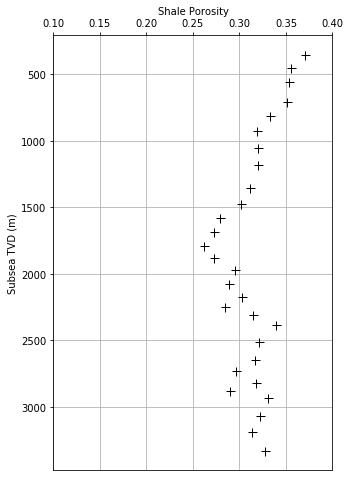

In [3]:
#Make sure data was digitized properly
fig,ax=plt.subplots(figsize=(5,8))
df.plot(x='Shale Porosity',y='SubseaTVD(m)',linestyle='',marker='+',markerSize=9,color='k',ax=ax,legend=False)
ax.xaxis.tick_top()
ax.set_xlabel('Shale Porosity')
ax.set_ylabel('Subsea TVD (m)')
ax.xaxis.set_label_position('top') 
ax.set_xlim([0.1,0.4])
ax.invert_yaxis()
ax.grid()

a) Compute and plot pore pressure assuming hydrostatic por pressure gradient dPp/dz = 0.465 psi/ft

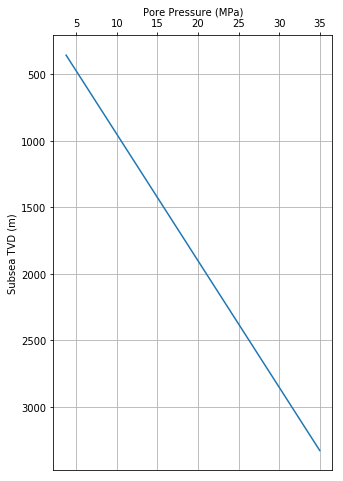

In [4]:
# I will work in SI units today
gradPp = 0.465 #psi/ft
gradPp *= 22620.6 #Pa/m
df['Pore Pressure'] = gradPp*df['SubseaTVD(m)']/1e6 #MPa
fig,ax=plt.subplots(figsize=(5,8))
df.plot(x='Pore Pressure',y='SubseaTVD(m)',ax=ax,legend=False)
ax.xaxis.tick_top()
ax.set_xlabel('Pore Pressure (MPa)')
ax.set_ylabel('Subsea TVD (m)')
ax.xaxis.set_label_position('top') 
ax.invert_yaxis()
ax.grid()


b) Compute and plot total vertical stress assuming dSv/dz = 0.950 psi/ft and pick the seafloor from the shallowest data point in "percent sand" plot

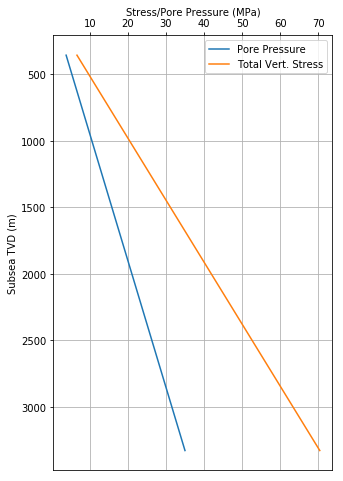

In [5]:
gradSv = 0.950 #psi/ft
gradSv *= 22620.6 #Pa/m

# I will pick the seafloor as 50 [m] since that appears to be the shallowed datapoint
# in the percent sand plot (not shown here)
seaFloor = 50

df['Total Vert. Stress'] = gradSv*(df['SubseaTVD(m)']-seaFloor)/1e6 #MPa

fig,ax=plt.subplots(figsize=(5,8))
df.plot(x='Pore Pressure',y='SubseaTVD(m)',ax=ax,label='Pore Pressure')
df.plot(x='Total Vert. Stress',y='SubseaTVD(m)',ax=ax,label='Total Vert. Stress')

ax.xaxis.tick_top()
ax.set_xlabel('Stress/Pore Pressure (MPa)')
ax.set_ylabel('Subsea TVD (m)')
ax.xaxis.set_label_position('top') 
ax.invert_yaxis()
ax.grid()

c) Digitize shale data and fit equation of porosity as a function of vertical effecitve stress from 400 m to 1800 m assuming hydrostatic pore pressure an exponential model on porosity and a logarithmic model on void ratio.

In [6]:
df['Eff. Vert. Stress'] = df['Total Vert. Stress'] - df['Pore Pressure'] #MPa
df['Void Ratio'] = df['Shale Porosity']/(1-df['Shale Porosity'])
select = (df['SubseaTVD(m)'] > 400) & (df['SubseaTVD(m)'] < 1800)
miniDF = df[select]

def fun_porosity(x,beta):
    #Exponential model on porosity
    phi0 = df['Shale Porosity'].iloc[0]
    return phi0*np.exp(-beta*x)

def fun_void(x,Cc):
    #Logarithmic model on void ratio
    phi0 = df['Shale Porosity'].iloc[0]
    e0 = phi0/(1-phi0)
    return e0 - Cc*np.log(x/1)


beta_opt, beta_cov = curve_fit(fun_porosity,miniDF['Eff. Vert. Stress'],miniDF['Shale Porosity'])
Cc_opt, Cc_cov = curve_fit(fun_void,miniDF['Eff. Vert. Stress'],miniDF['Void Ratio'])

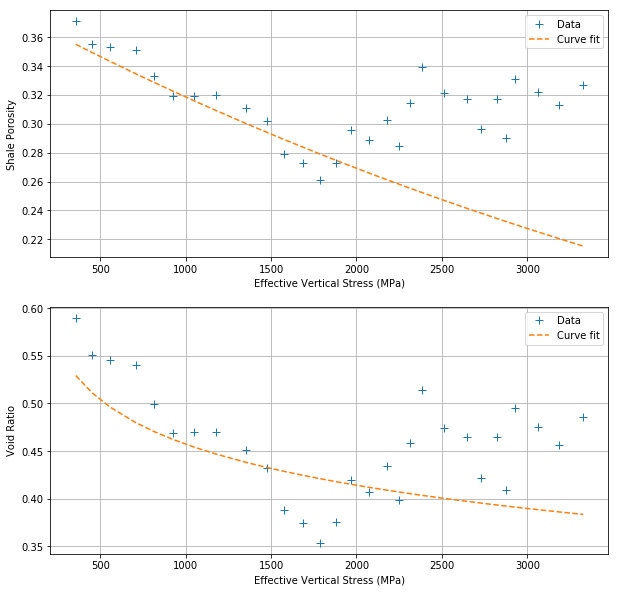

In [7]:
#Check the fit
df['Estimated Porosity'] = df['Shale Porosity'].iloc[0]*np.exp(-beta_opt*df['Eff. Vert. Stress'])
df['Estimated Void Ratio'] = df['Void Ratio'].iloc[0] - Cc_opt*np.log(df['Eff. Vert. Stress']/1)

fig,ax=plt.subplots(2,1,figsize=(10,10))
df.plot(y='Shale Porosity',x='SubseaTVD(m)',linestyle='',marker='+',markerSize=8,ax=ax[0],label='Data')
df.plot(y='Estimated Porosity',x='SubseaTVD(m)',linestyle='--',ax=ax[0],label='Curve fit')
df.plot(y='Void Ratio',x='SubseaTVD(m)',linestyle='',marker='+',markerSize=8,ax=ax[1],label='Data')
df.plot(y='Estimated Void Ratio',x='SubseaTVD(m)',linestyle='--',ax=ax[1],label='Curve fit')

ax[0].legend()
ax[0].set_ylabel('Shale Porosity')
ax[0].set_xlabel('Effective Vertical Stress (MPa)')
ax[0].grid()
ax[1].legend()
ax[1].set_ylabel('Void Ratio')
ax[1].set_xlabel('Effective Vertical Stress (MPa)')
ax[1].grid()

d) Calculate and plot actual pore pressure between interval 1800 and 3400 m assuming porosity is a function of vertical effective stress with the models calculated in point c.

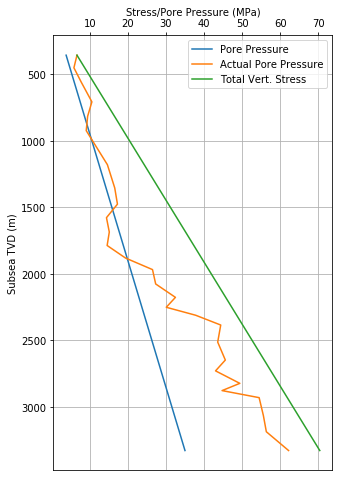

In [8]:
df['Actual Pore Pressure'] = df['Total Vert. Stress'] + np.log(df['Shale Porosity']/df['Shale Porosity'].iloc[0])/beta_opt
select = (df['SubseaTVD(m)'] > 1800) & (df['SubseaTVD(m)'] < 3400)
miniDF = df#[select]

fig,ax=plt.subplots(figsize=(5,8))
miniDF.plot(x='Pore Pressure',y='SubseaTVD(m)',ax=ax,label='Pore Pressure')
miniDF.plot(x='Actual Pore Pressure',y='SubseaTVD(m)',ax=ax,label='Actual Pore Pressure')
miniDF.plot(x='Total Vert. Stress',y='SubseaTVD(m)',ax=ax,label='Total Vert. Stress')

ax.xaxis.tick_top()
ax.set_xlabel('Stress/Pore Pressure (MPa)')
ax.set_ylabel('Subsea TVD (m)')
ax.xaxis.set_label_position('top') 
ax.invert_yaxis()
ax.grid()

e) Calculate and plot overpressure parameter as a function of depth.

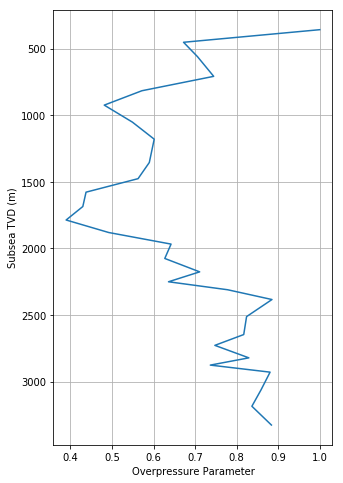

In [9]:
df['OP param'] = df['Actual Pore Pressure']/df['Total Vert. Stress']

fig,ax=plt.subplots(figsize=(5,8))

df.plot(x='OP param',y='SubseaTVD(m)',label='Overpressure Parameter',legend=False,ax=ax)
ax.set_xlabel('Overpressure Parameter')
ax.set_ylabel('Subsea TVD (m)')
ax.invert_yaxis()
ax.grid()

f) Summarize the results with plots

[]

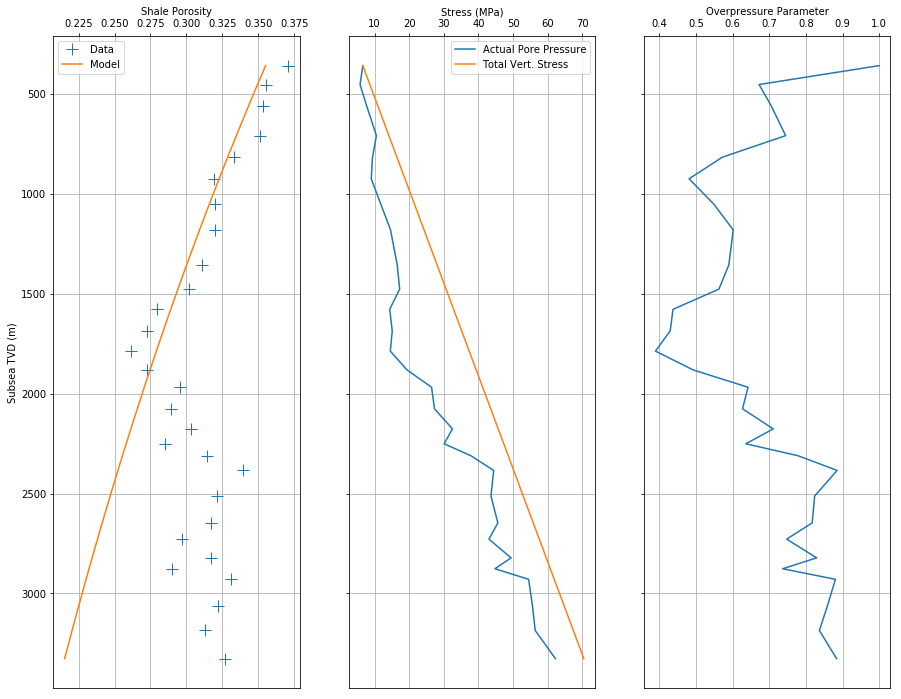

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,12))
#porosity (model and data) in log scale as function of depth on y-axis
df.plot(x='Shale Porosity',y='SubseaTVD(m)',linestyle='',marker='+',markerSize=12,ax=ax[0],label='Data')
df.plot(x='Estimated Porosity',y='SubseaTVD(m)',linestyle='-',ax=ax[0],label='Model')
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Shale Porosity')
ax[0].xaxis.set_label_position('top') 
ax[0].invert_yaxis()
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel('Subsea TVD (m)')

# Sv and actual Pp as a function of depth y-axis
df.plot(x='Actual Pore Pressure',y='SubseaTVD(m)',ax=ax[1],label='Actual Pore Pressure')
df.plot(x='Total Vert. Stress',y='SubseaTVD(m)',ax=ax[1],label='Total Vert. Stress')
ax[1].xaxis.tick_top()
ax[1].set_xlabel('Stress (MPa)')
ax[1].xaxis.set_label_position('top') 
ax[1].invert_yaxis()
ax[1].grid()
ax[1].get_yaxis().set_ticklabels([])

#overpressure parameter as a function of depth y-axis
df.plot(x='OP param',y='SubseaTVD(m)',label='Overpressure Parameter',legend=False,ax=ax[2])
ax[2].set_xlabel('Overpressure Parameter')
ax[2].xaxis.tick_top()
ax[2].set_xlabel('Overpressure Parameter')
ax[2].xaxis.set_label_position('top') 
ax[2].invert_yaxis()
ax[2].grid()
ax[2].get_yaxis().set_ticklabels([])

## 2) Clam-clay model

In [59]:
#Setup all the constants for the simulation
G = 1 #MPa
phiCS = 24 #deg
lam = 0.25 
K = 0.05
M=np.c((phiCS)*np.pi/180)

#Simulation step size
pStep = 0.001
qStep = 3*pStep #3 times p step because this is a triaxial test

#Initial values
p_initial = 200/1000 #Pa
q_initial = 0
p0_initial = 250/1000 #Pa
e0 = 1.15


0.40673664307580015


a) Plot the stress path q vs. p'. plot the initial yield surface and the final yield surface. Is there hardening or softening?

In [56]:
#Initialize variables for simulation 
p=p_initial
q=q_initial
e=e0
p0=p0_initial
epsP=0
epsQ=0
failed = False

#Container for simulation results
holder = {'P':[],'q':[],'e': [],'P0':[],'epsQ':[],'epsP':[]}

#Run simulation
while not failed:
    v = 1+e
    eta = q/p
    termLK = (lam-K)/(v*p*(M**2 + eta**2))
    
    deP_Elastic = K*pStep/(p*v)
    deQ_Elastic = qStep/(3*G)
    
    deP_Plastic = termLK*((M**2 - eta**2)*pStep + 2*eta*qStep)
    deQ_Plastic = termLK*(( 4*(eta**2)/(M**2 - eta**2))*qStep + 2*eta*pStep)
    eStep = v*deP_Plastic
    p0Step = v*deP_Plastic*p0/(lam-K)
    
    p += pStep
    q += qStep
    p0+= p0Step
    e += eStep
    epsP += deP_Plastic+deP_Elastic
    epsQ += deQ_Plastic+deQ_Elastic 

    if M <= q/p:
        failed = True
        print("Material failed. Simulation complete.")
    else:
        holder['P'].append(p)
        holder['q'].append(q)
        holder['e'].append(e)
        holder['P0'].append(p0)
        holder['epsP'].append(epsP)
        holder['epsQ'].append(epsQ)
        
df = pd.DataFrame(holder)

Material failed. Simulation complete.


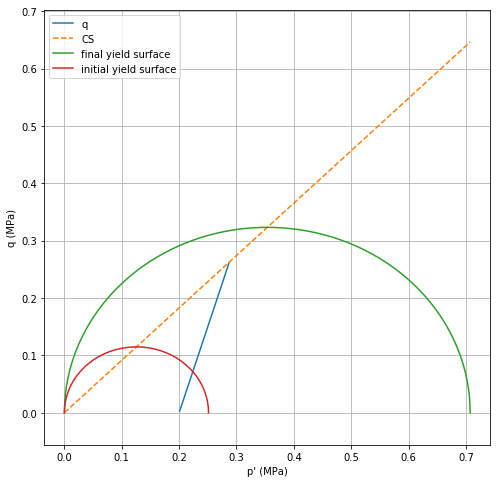

In [58]:
fig,ax=plt.subplots(figsize=(8,8))
df.plot(x='P',y='q',ax=ax)
X=np.linspace(0,df['P0'].max())
CSL=X*M
ax.plot(X,CSL,'--',label='CS')
plt.axis('equal')

#Plot failure surfaces
idx = [len(df['P0'])-1,0]
names = ['final','initial']
for i in zip(idx,names):
    ID = i[0]
    name = i[1]
    p0=df['P0'].iloc[ID]
    x=np.linspace(0,df['P0'].iloc[ID],1000)
    y = np.sqrt((M**2)*x*(p0-x))
    ax.plot(x,y,label=name + ' yield surface')
    c=np.array([p0/2])
    ax.set_ylabel('q (MPa)')
    ax.set_xlabel("p' (MPa)")

ax.legend()
ax.grid()


## The material is becoming more difficult to make the material yield, and q is increasing asymptoptically with epsQ. This leads me to believe that hardening is very likely what is happening.

b) Plot q as a funciton of eq. Why does it approximate as asymptoptic value?

Text(0.5,0,'epsQ')

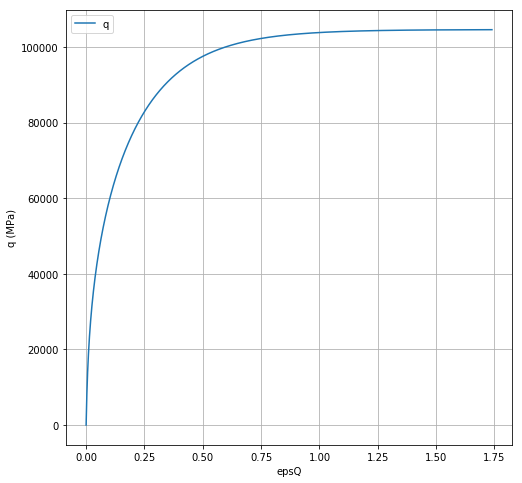

In [14]:
fig,ax=plt.subplots(figsize=(8,8))
df.plot(x='epsQ',y='q',ax=ax)
ax.legend()
ax.grid()
ax.set_ylabel('q (MPa)')
ax.set_xlabel('epsQ')

## After passing the yield surface, the material gets stronger and stronger as it is deformed, but this growth becomes saturated as the material approaches the critical state line. 

c) Plot void ratio e as a funciton of p' (with p' in log scale). Why is there a clear change of slope?

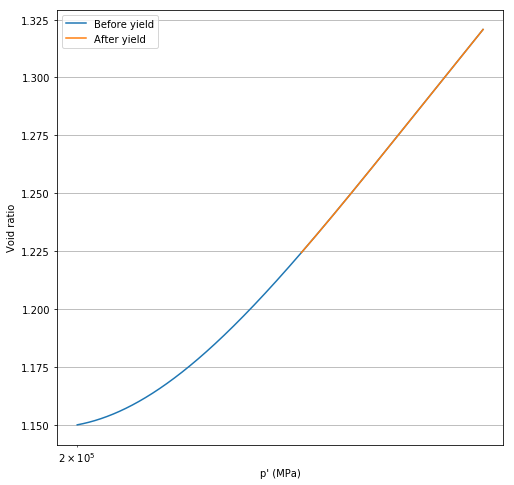

In [15]:
fig,ax=plt.subplots(figsize=(8,8))
df.plot(x='P',y='e',label='Before yield',ax=ax)
select = df['q'] >= p0_initial*M/2
miniDF = df[select]
miniDF.plot(x='P',y='e',ax=ax,label='After yield')
ax.set_xscale('log')
ax.set_ylabel('Void ratio')
ax.set_xlabel("p' (MPa)")

ax.legend()
ax.grid()

## The change in slope is due to the material behavior switching from elastic to plastic after the material passes the initial yield surface